---
layout: page
title: House sparrow example
---

# Case study -- birds from the UK

In this example, we will build a map of the observations of birds from the
United Kingdom.

In [1]:
using GBIF

## Getting the data

The first thing is to specify the `taxonKey` -- this is explained in the [GBIF
taxonomy][tax] (but lookup feature will be added to the package later), and the
country (`GB`). Because the GBIF API cannot return more than 200000 records
(that's already quite a lot, but common species have been observed far more), we
will (i) focus on a single common species (the House sparrow, `5231190`), and
only observations for the year 2015.

[tax]: http://www.gbif.org/species/search?dataset_key=d7dddbf4-2cf0-4f39-9b2a-bb099caae36c

In [2]:
uk_birds_query = Dict(
  "taxonKey"=>5231190,
  "country"=>"GB",
  "hasCoordinate"=>true,
  "year"=>"2015")
uk_birds = occurrences(uk_birds_query)
println("There are ", uk_birds.count, " records available")

This is good! We can complete the request. This would take a while, since we are
going through interactions 20 at a time. We can speed up the process a little
bit, by requesting 200 records on every page. GBIF will not let you ask for more
than 200 records by page.

In [3]:
uk_birds.query["limit"] = 200

200

Let's now complete the request for real:

In [4]:
complete!(uk_birds)

Once this is done, we can start looking at observations. Let's load the `Plots`
package to help us.

In [5]:
using Plots
pyplot() # Feel free to replace by your favorite backend

INFO: Recompiling stale cache file /home/tpoisot/.julia/lib/v0.6/SpecialFunctions.ji for module SpecialFunctions.


We'll start by looking at the number of observations by month:


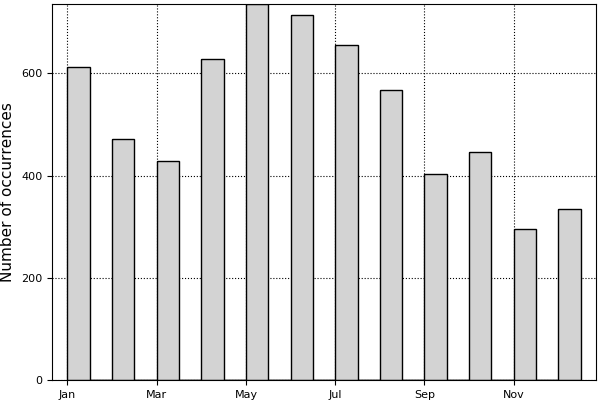

In [6]:
obs_dates = map(x -> x.date, uk_birds.occurrences)
by_month = Dates.month.(obs_dates)
histogram(by_month,
  xticks=([1,3,5,7,9,11],["Jan","Mar","May","Jul","Sep","Nov"]),
  c=:lightgrey, lab="", ylab="Number of occurrences")

We can now have a look at the latitude / longitude of the points:


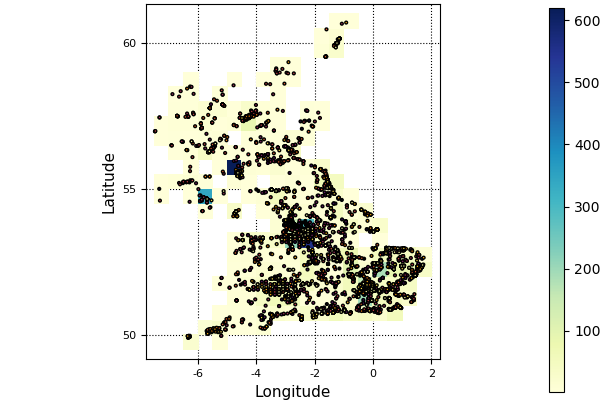

In [7]:
latlon = map(x -> [x.longitude, x.latitude], uk_birds.occurrences)
x = hcat(latlon...)'
histogram2d(x[:,1], x[:,2], c=:YlGnBu, nbins=25, aspectratio=1)
scatter!(x[:,1], x[:,2], mc=by_month, ms=2, lab="")
xaxis!("Longitude")
yaxis!("Latitude")

And voilà!